### Matriz de correlaciones
[Ejemplo](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from subprocess import check_output
#print(check_output(['ls', './data']).decode('utf-8'))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

datasetCarsFinal = pd.read_csv('./data/autosFinal.csv',
                               dtype={'brand': 'str', 
                                      'model': 'str', 
                                      'vehicleType': 'str', 
                                      'gearbox': 'str', 
                                      'yearOfRegistration': np.int64,
                                      'fuelType': 'str',
                                      'powerPS': np.int64,
                                      'kilometer': np.int64,
                                      'kilometerCategorical': 'str',
                                      #'kilometer000': np.int64,
                                      'notRepairedDamage': 'str',
                                      'postalCode': 'str',
                                      'state': 'str',
                                      'community': 'str',
                                      'price': np.int64})
datasetCarsFinal.columns
datasetCarsFinal.head()

,postalCode,state,community,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometerCategorical,fuelType,brand,model,notRepairedDamage,kilometer
0,90480,Bayern,Nürnberg,9800,suv,2004,automatik,163,km>100000,diesel,jeep,grand,Not applicable,125000
1,91074,Bayern,Landkreis Erlangen-Höchstadt,1500,kleinwagen,2001,manuell,75,km>100000,benzin,volkswagen,golf,nein,150000
2,60437,Hessen,"Frankfurt am Main, Stadt",3600,kleinwagen,2008,manuell,69,50000>km<100000,diesel,skoda,fabia,nein,90000
3,33775,Nordrhein-Westfalen,Gütersloh,650,limousine,1995,manuell,102,km>100000,benzin,bmw,3er,ja,150000
4,67112,Rheinland-Pfalz,Rhein-Pfalz-Kreis,2200,cabrio,2004,manuell,109,km>100000,benzin,peugeot,2_reihe,nein,150000


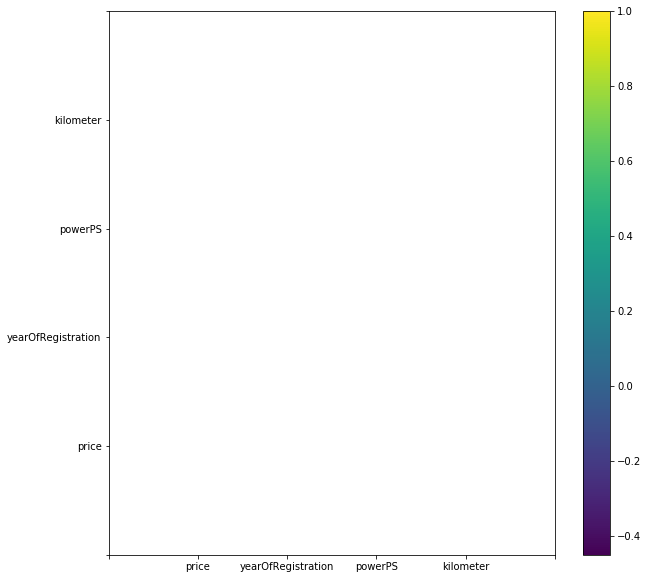

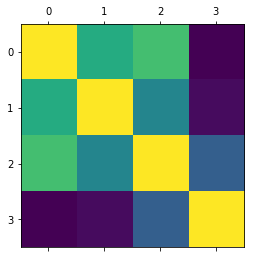

In [3]:
'''
Correlation matrix
'''
datasetCarsFinal[['price', 'yearOfRegistration', 'powerPS', 'kilometer']].corr()

labels = ['price', 'yearOfRegistration', 'powerPS', 'kilometer']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = plt.matshow(datasetCarsFinal[['price', 'yearOfRegistration', 'powerPS', 'kilometer']].corr())
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()


In [5]:
import seaborn as sns
sns.set(style="white")

In [7]:
# Compute the correlation matrix
corr = datasetCarsFinal[['price', 'yearOfRegistration', 'powerPS', 'kilometer']].corr()
corr

,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.439887,0.563985,-0.450173
yearOfRegistration,0.439887,1.000000,0.212275,-0.406698
powerPS,0.563985,0.212275,1.000000,-0.012549
kilometer,-0.450173,-0.406698,-0.012549,1.000000


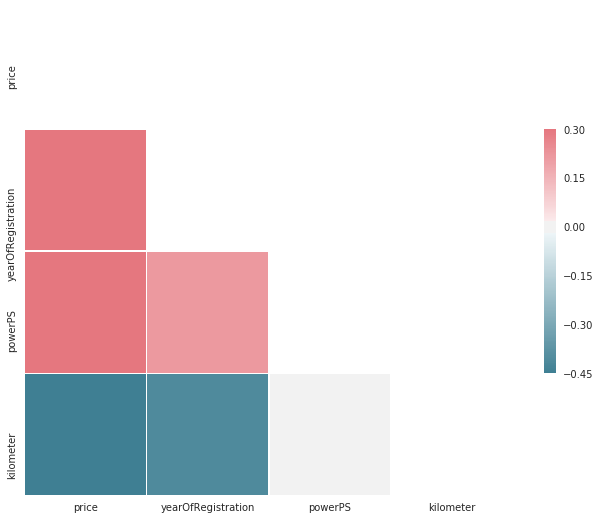

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})